## Observations and Insights 

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse = pd.read_csv(mouse_metadata_path)
study = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mdf = pd.merge(mouse, study, on = "Mouse ID")

# Display the data table for preview
mdf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [96]:
# Checking the number of mice.
num_of_mice = mdf["Mouse ID"].nunique()
num_of_mice

249

In [97]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
thing=mdf[mdf.duplicated(["Mouse ID", "Timepoint"], keep=False)]
thing

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [98]:
# Optional: Get all the data for the duplicate mouse ID. 
that=mdf.loc[mdf["Mouse ID"].isin(thing["Mouse ID"].unique())]
that

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [99]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=mdf.loc[~mdf["Mouse ID"].isin(thing["Mouse ID"].unique())]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [100]:
# Checking the number of mice in the clean DataFrame.
num=df["Mouse ID"].nunique()
num

248

## Summary Statistics

In [101]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
gdf = df.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = gdf["Tumor Volume (mm3)"].mean()
median = gdf["Tumor Volume (mm3)"].median()
variance = gdf["Tumor Volume (mm3)"].var()
standard_deviation = gdf["Tumor Volume (mm3)"].std()
sem = gdf["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
result=pd.DataFrame({"Mean":mean, 
                     "Median": median,
                    "Variance": variance,
                    "Standard Deviation": standard_deviation,
                    "SEM": sem})
result

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
result2 = df.groupby(["Drug Regimen"]).agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
result2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

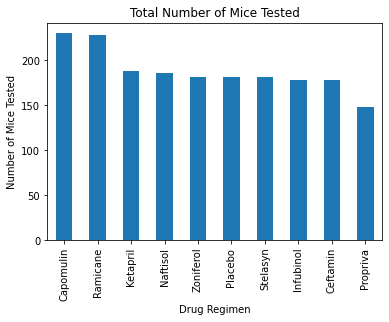

In [105]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

counts = clean_df['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.title("Total Number of Mice Tested")
plt.show()

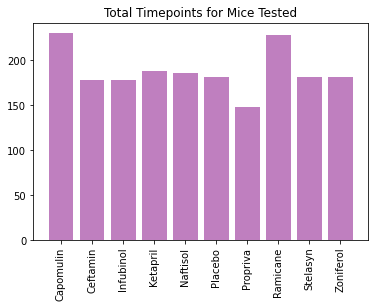

In [108]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#grouping by drug regimen
mice_group = clean_df.groupby("Drug Regimen")

#regimen totals
regimen_totals_df = mice_group["Timepoint"].count()

#create list for y-axis
py_y_axis = list(regimen_totals_df)

#extract info for x-axis
py_x_data = regimen_totals_df.reset_index()

#create list for x-axis
py_x_data_list = list(py_x_data["Drug Regimen"])

#create an array to give a numeric value for the x axis data
py_x_axis = np.arange(len(py_x_data_list))

#create graph
plt.bar(py_x_axis, py_y_axis, color='purple', alpha=0.5, align="center")

#add labels to the x axis
tick_locations = [value for value in py_x_axis]
plt.xticks(tick_locations, py_x_data_list)
plt.xticks(rotation=90)
plt.title("Total Timepoints for Mice Tested")

#diplay graph
plt.show()

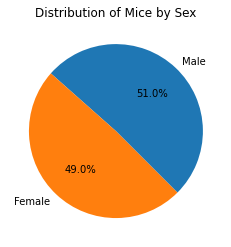

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#group by gender
gender_df = clean_df["Sex"].value_counts()

#pie graph
gender_df.plot(kind="pie", y='Count', title="Distribution of Mice by Sex", startangle=315, autopct = "%1.1f%%")
plt. ylabel("")

#display graph
plt.show()

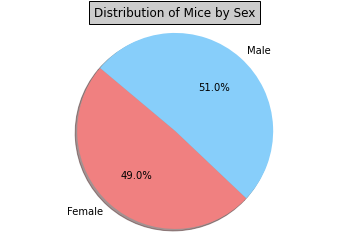

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#group by gender
gender_df = (clean_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()

#obtaining gender totals
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

#creating x and y axis
labels = gender_df["Sex"]
size = gender_df["Count"]

#visual
colors = ["lightcoral", "lightskyblue"]

#creating pie graph
plt.pie(size, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Distribution of Mice by Sex", bbox={'facecolor':'0.8', 'pad':5})

#display graph
plt.show()

## Quartiles, Outliers and Boxplots

In [113]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimen_df = clean_df[clean_df["Drug Regimen"].isin(regimen)]
max_timepoint_df = pd.DataFrame(regimen_df.groupby(["Mouse ID"])["Timepoint"].max())
max_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_info_df = pd.merge(regimen_df, max_timepoint_df, on=["Mouse ID", "Timepoint"], how="inner")
merge_info_df = merge_info_df.drop(["Sex", "Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"], axis=1)
#pd.set_option('display.max_rows', None)

#display DataFrame
merge_info_df.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,22.050126
1,s185,Capomulin,23.343598
2,x401,Capomulin,28.484033
3,m601,Capomulin,28.430964
4,g791,Ramicane,29.128472


In [118]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df = merge_info_df.loc[merge_info_df["Drug Regimen"]==drug]
    drug_volume = drug_df["Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume.append(drug_volume)
    
    # Determine outliers using upper and lower bounds


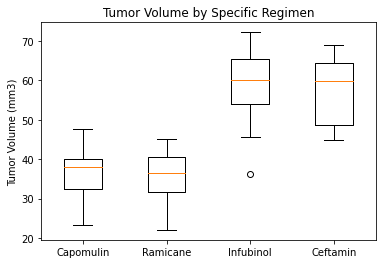

In [119]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume by Specific Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(tumor_volume)
plt.xticks(range(1, len(regimen) + 1), regimen)
plt.show()

## Line and Scatter Plots

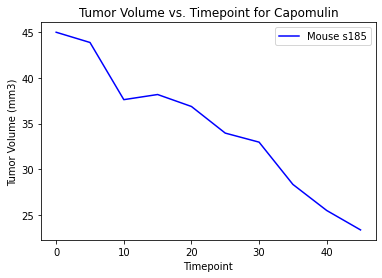

In [122]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_identification = clean_df.loc[clean_df["Mouse ID"]=="s185"]
mouse_identification

x_line = mouse_identification["Timepoint"]
y_line = mouse_identification["Tumor Volume (mm3)"]

line_graph, = plt.plot(x_line, y_line, color="blue", label="Mouse s185")
plt.title("Tumor Volume vs. Timepoint for Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(handles=[line_graph], loc="best")
plt.show()

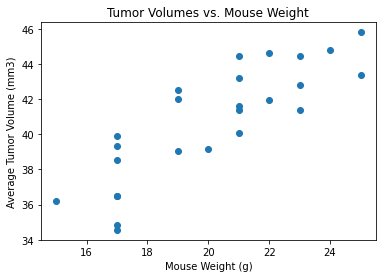

In [124]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
regimen_sort = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
regimen_sort

mice_avgs = regimen_sort.groupby(["Mouse ID"]).mean()
mice_avgs

plt.scatter(mice_avgs["Weight (g)"], mice_avgs["Tumor Volume (mm3)"])
plt.title("Tumor Volumes vs. Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#disply graph
plt.show()

## Correlation and Regression

The correlation between mouse weight and tumor volume is 0.84.


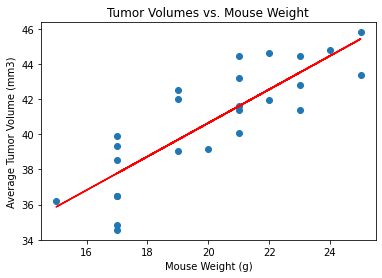

In [125]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(mice_avgs["Weight (g)"], mice_avgs["Tumor Volume (mm3)"])[0],2)
print(f'The correlation between mouse weight and tumor volume is {correlation}.')

lin_regre = st.linregress(mice_avgs["Weight (g)"], mice_avgs["Tumor Volume (mm3)"])
lin_regre

yvalues = mice_avgs["Weight (g)"] * lin_regre[0] + lin_regre[1]
yvalues
plt.scatter(mice_avgs["Weight (g)"], mice_avgs["Tumor Volume (mm3)"])
plt.plot(mice_avgs["Weight (g)"], yvalues, color="r")
plt.title("Tumor Volumes vs. Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()